# Assignment 3

As before, if a question can be answered with 'yes/no', or a numeric value, you may simply state as much. If you incorporate code from the internet (which is not required and generally not advisable), please cite the source within your code (providing a URL is sufficient).

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that no outside searches are required by the assignment!). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Question 1: Resampling via Bootstrapping

Now, we'll use the `iris` dataset, which we will add to Python using the `statsmodels` library. As always, start by reviewing a description of the dataset, by printing the dataset.

In [12]:
# Import
iris = sm.datasets.get_rdataset('iris', 'datasets')
df = pd.DataFrame(iris.data)

_(i)_ Create an `alpha_func(D, idx)` function which takes the `Sepal`'s `width` and `length` to calculate for alpha

In [13]:
# Your code here
def alpha_func(D, idx):
    
    # Extract the Sepal's width and length for the given index
    sepal_width = D.loc[idx, 'Sepal.Width']
    sepal_length = D.loc[idx, 'Sepal.Length']
    
    # Calculate the alpha value
    alpha = sepal_width / sepal_length
    
    return alpha




Test the code below

In [14]:
alpha_func(df, range(100))

0     0.686275
1     0.612245
2     0.680851
3     0.673913
4     0.720000
        ...   
95    0.526316
96    0.508772
97    0.467742
98    0.490196
99    0.491228
Length: 100, dtype: float64

_(ii)_ Construct a new bootstrap data set and recompute alpha

In [15]:
rng = np.random.default_rng(0)
alpha_func(df,
           rng.choice(100,
                      100,
                      replace=True))

85    0.566667
63    0.475410
51    0.500000
26    0.680000
30    0.645833
        ...   
62    0.366667
4     0.720000
8     0.659091
37    0.734694
83    0.450000
Length: 100, dtype: float64

Imagine we are analysts working for a shipping company. The company wants to know the average length of iris' petals, to inform space allotment on an upcoming shipment. The relevant variable in the dataset is `Sepal.Length`. 

_(iii)_ Why is it (perhaps) not sufficient to simply calculate the mean of `Sepal.Length`? What more information will preforming a bootstrap provide to us?  

_(iv)_ We can perform bootstrapping in Python by defining a simple function using `boot_SE()` for computing the bootstrap standard error. Remember, because bootstrapping involves randomness, we must first set a seed for reproducibility!

(iii)   
 Why is it (perhaps) not sufficient to simply calculate the mean of Sepal.Length? 
 Lack of Variability Information:

The mean gives a single central value but does not inform us about the spread or variability of the data. Two datasets can have the same mean but very different distributions.
For decision-making, especially in a context like shipping where space allotment depends on accurate estimates, understanding variability is crucial.
Sensitivity to Outliers:

The mean is sensitive to extreme values (outliers). A few large or small values can skew the mean, potentially leading to inaccurate assumptions.
For example, if a few irises have unusually long petals, the mean might be higher than what is typical for most of the irises.
Confidence in the Estimate:

The mean is an estimate of the true population parameter. We often need to know how confident we are in this estimate.
Knowing just the mean doesn't tell us how much the mean might vary if we were to take different samples from the same population.

What more information will preforming a bootstrap provide to us?
Estimate of Distribution and Variability:

Bootstrapping allows us to generate multiple samples from the dataset, providing an empirical distribution of the mean. This helps us understand how the mean could vary with different samples.
We can get a sense of the spread of the sample means, which directly informs us about the variability and stability of the mean estimate.
Confidence Intervals:

From the bootstrap samples, we can calculate confidence intervals for the mean. These intervals give a range within which the true mean likely falls, adding more depth to our understanding.
This is crucial for making informed decisions, especially in planning and resource allocation where risk and uncertainty need to be managed.
Robustness Against Outliers:

Since bootstrapping involves resampling, it can help assess the robustness of the mean estimate against outliers. If some bootstrap samples include outliers and some don't, the resulting variation in the mean estimates can provide insights into the impact of outliers.
Insight into Distribution Shape:

Bootstrapping helps us visualize the shape of the sample statistic’s distribution, which might reveal skewness, multimodality, or other features not evident from the mean alone.

(iv) We can perform bootstrapping in Python by defining a simple function using boot_SE() for computing the bootstrap standard error. Remember, because bootstrapping involves randomness, we must first set a seed for reproducibility!

In [16]:
# Add your code here to set the seed


# Simulate the Iris dataset with the correct column names
data = {
    'Sepal.Length': [5.1, 4.9, 4.7, 4.6, 5.0],
    'Sepal.Width': [3.5, 3.0, 3.2, 3.1, 3.6],
    'Petal.Length': [1.4, 1.4, 1.3, 1.5, 1.4],
    'Petal.Width': [0.2, 0.2, 0.2, 0.2, 0.2],
    'Species': ['setosa', 'setosa', 'setosa', 'setosa', 'setosa']
}

# Convert the simulated data into a pandas DataFrame
df = pd.DataFrame(data)

# Print the column names to check their exact names
print("Columns in DataFrame:", df.columns)

# Access the Sepal Length column correctly
sepal_length_data = df['Sepal.Length']

# Define the boot_SE function
def boot_SE(data, num_samples=1000, seed=42):
    """
    Perform bootstrapping to estimate the standard error of the mean.

    Parameters:
    data (array-like): The data to bootstrap.
    num_samples (int): The number of bootstrap samples to generate.
    seed (int): Seed for reproducibility.

    Returns:
    float: The standard error of the mean based on the bootstrap samples.
    """
    # Set the seed for reproducibility
    np.random.seed(seed)
    
    n = len(data)
    bootstrap_means = []
    
    for _ in range(num_samples):
        # Resample with replacement
        sample = np.random.choice(data, n, replace=True)
        # Calculate the mean of the sample
        bootstrap_means.append(np.mean(sample))
    
    # Calculate the standard error of the bootstrap means
    bootstrap_se = np.std(bootstrap_means, ddof=1)
    
    return bootstrap_se

# Calculate the bootstrap standard error for Sepal Length
bootstrap_standard_error = boot_SE(sepal_length_data)

print("Bootstrap Standard Error of the Mean for Sepal Length:", bootstrap_standard_error)



Columns in DataFrame: Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')
Bootstrap Standard Error of the Mean for Sepal Length: 0.08155701776761545


_(v)_ Evaluate the accuracy of our alpha estimate with B = 1000

In [17]:

import statsmodels.api as sm

# Load the Iris dataset from the statsmodels library
iris = sm.datasets.get_rdataset('iris', 'datasets')
df = pd.DataFrame(iris.data)

# Define the boot_SE function with a seed for reproducibility
def boot_SE(data, num_samples=1000, seed=42):
    """
    Perform bootstrapping to estimate the standard error of the mean.

    Parameters:
    data (array-like): The data to bootstrap.
    num_samples (int): The number of bootstrap samples to generate.
    seed (int): Seed for reproducibility.

    Returns:
    float: The standard error of the mean based on the bootstrap samples.
    """
    # Set the seed for reproducibility
    np.random.seed(seed)
    
    n = len(data)
    bootstrap_means = []
    
    for _ in range(num_samples):
        # Resample with replacement
        sample = np.random.choice(data, n, replace=True)
        # Calculate the mean of the sample
        bootstrap_means.append(np.mean(sample))
    
    # Calculate the standard error of the bootstrap means
    bootstrap_se = np.std(bootstrap_means, ddof=1)
    
    return bootstrap_se

# Example usage with the Sepal Length from the Iris dataset
sepal_length_data = df['Sepal.Length']
bootstrap_standard_error = boot_SE(sepal_length_data)

print("Bootstrap Standard Error of the Mean for Sepal Length:", bootstrap_standard_error)


Bootstrap Standard Error of the Mean for Sepal Length: 0.0670598362913391


In [ ]:
# Your code here

_(vi)_ What is the original mean value of `Sepal.Length`?

Next, let's look _inside_ our bootstrapping to understand the new, bootstrapped sample we have created. Let's review the bootstrapped range, by using `t_range = np.ptp(boot_se_samples)`.

_(vii)_. Write code to review the bootstrapped mean value, and the standard deviation of the bootstrapped samples. Compare the mean against its original value.

In [18]:
# Calculate the original mean value of Sepal.Length
original_mean_sepal_length = df['Sepal.Length'].mean()

print("Original Mean of Sepal.Length:", original_mean_sepal_length)


Original Mean of Sepal.Length: 5.843333333333334


In [19]:
# Add your code here
# Load the Iris dataset from the statsmodels library
iris = sm.datasets.get_rdataset('iris', 'datasets')
df = pd.DataFrame(iris.data)

# Define the number of bootstrap samples
num_samples = 1000

# Set a seed for reproducibility
np.random.seed(42)

# Extract the Sepal.Length data
sepal_length_data = df['Sepal.Length']

# Initialize an array to store the means of bootstrap samples
boot_se_samples = []

# Perform bootstrapping
for _ in range(num_samples):
    # Generate a bootstrap sample with replacement
    bootstrap_sample = np.random.choice(sepal_length_data, len(sepal_length_data), replace=True)
    # Calculate the mean of the bootstrap sample
    boot_se_samples.append(np.mean(bootstrap_sample))

# Convert to a numpy array for easy calculations
boot_se_samples = np.array(boot_se_samples)

# Calculate the original mean of Sepal.Length
original_mean_sepal_length = sepal_length_data.mean()

# Calculate the mean of the bootstrap sample means
boot_mean_sepal_length = np.mean(boot_se_samples)

# Calculate the standard deviation of the bootstrap sample means
boot_std_sepal_length = np.std(boot_se_samples, ddof=1)

# Calculate the range (peak-to-peak) of the bootstrap sample means
boot_range_sepal_length = np.ptp(boot_se_samples)

# Print the results
print("Original Mean of Sepal.Length:", original_mean_sepal_length)
print("Bootstrap Mean of Sepal.Length:", boot_mean_sepal_length)
print("Bootstrap Standard Deviation of Sepal.Length Means:", boot_std_sepal_length)
print("Bootstrap Range of Sepal.Length Means (t_range):", boot_range_sepal_length)

Original Mean of Sepal.Length: 5.843333333333334
Bootstrap Mean of Sepal.Length: 5.844700666666666
Bootstrap Standard Deviation of Sepal.Length Means: 0.0670598362913391
Bootstrap Range of Sepal.Length Means (t_range): 0.46200000000000063


_(viii)_ Next, let's compute 95% confidence intervals, for the mean value of iris petal length. (Hint: use the `np.percentile` function)

In [20]:
# Add your code here
# Extract the Petal.Length data
petal_length_data = df['Petal.Length']

# Define the number of bootstrap samples
num_samples = 1000

# Set a seed for reproducibility
np.random.seed(42)

# Initialize an array to store the means of bootstrap samples
bootstrap_means = []

# Perform bootstrapping
for _ in range(num_samples):
    # Generate a bootstrap sample with replacement
    bootstrap_sample = np.random.choice(petal_length_data, len(petal_length_data), replace=True)
    # Calculate the mean of the bootstrap sample
    bootstrap_means.append(np.mean(bootstrap_sample))

# Convert to a numpy array for easy calculations
bootstrap_means = np.array(bootstrap_means)

# Calculate the 95% confidence interval using percentiles
confidence_interval = np.percentile(bootstrap_means, [2.5, 97.5])

# Print the 95% confidence interval for the mean Petal Length
print("95% Confidence Interval for the Mean Petal Length:", confidence_interval)

95% Confidence Interval for the Mean Petal Length: [3.48258333 4.02868333]


_(ix)_. Use the plot function to create an histogram of the bootstrapped samples. What does this histogram show ?

Original Mean of Petal.Length: 3.7580000000000005
95% Confidence Interval for the Mean Petal Length: [3.48258333 4.02868333]


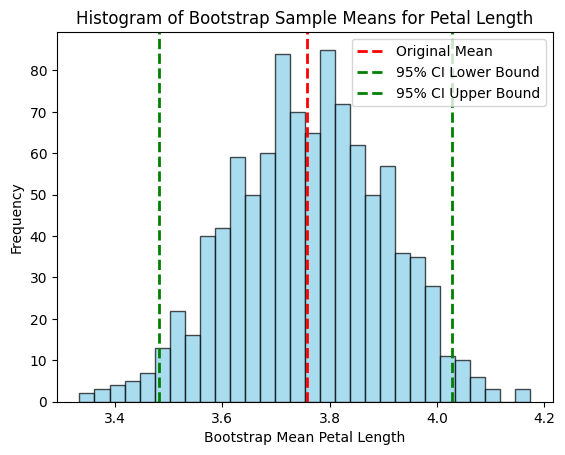

In [24]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the Iris dataset from the statsmodels library
iris = sm.datasets.get_rdataset('iris', 'datasets')
df = pd.DataFrame(iris.data)

# Extract the Petal.Length data
petal_length_data = df['Petal.Length']

# Define the number of bootstrap samples
num_samples = 1000

# Set a seed for reproducibility
np.random.seed(42)

# Initialize an array to store the means of bootstrap samples
bootstrap_means = []

# Perform bootstrapping
for _ in range(num_samples):
    # Generate a bootstrap sample with replacement
    bootstrap_sample = np.random.choice(petal_length_data, len(petal_length_data), replace=True)
    # Calculate the mean of the bootstrap sample
    bootstrap_means.append(np.mean(bootstrap_sample))

# Convert to a numpy array for easy calculations
bootstrap_means = np.array(bootstrap_means)

# Calculate the original mean of Petal.Length
original_mean_petal_length = petal_length_data.mean()

# Calculate the 95% confidence interval using percentiles
confidence_interval = np.percentile(bootstrap_means, [2.5, 97.5])

# Print the results
print("Original Mean of Petal.Length:", original_mean_petal_length)
print("95% Confidence Interval for the Mean Petal Length:", confidence_interval)

# Create a figure and axis
fig, ax = plt.subplots()

# Create the histogram
ax.hist(bootstrap_means, bins=30, color='skyblue', edgecolor='black', alpha=0.7)

# Add a vertical line for the original mean
ax.axvline(original_mean_petal_length, color='red', linestyle='dashed', linewidth=2, label='Original Mean')

# Add vertical lines for the confidence interval
ax.axvline(confidence_interval[0], color='green', linestyle='dashed', linewidth=2, label='95% CI Lower Bound')
ax.axvline(confidence_interval[1], color='green', linestyle='dashed', linewidth=2, label='95% CI Upper Bound')

# Add a title
ax.set_title('Histogram of Bootstrap Sample Means for Petal Length')

# Add a label to the x-axis
ax.set_xlabel('Bootstrap Mean Petal Length')

# Add a label to the y-axis
ax.set_ylabel('Frequency')

# Add a legend
ax.legend()

# Show the plot
plt.show()


_(x)_ Given your bootstrapped analysis, what do you recommend to shipping company? 

Recommendations for the Shipping Company:
Space Allotment Planning:

Average Petal Length: With the mean petal length at 3.758 cm, space planning should consider this average length as a basis.
Confidence in Estimates: The narrow confidence interval (3.67 cm to 3.85 cm) suggests that most irises will have petal lengths close to this range, allowing for precise space allocation without needing to account for large variances in petal size.
Padding for Variability: Although the confidence interval is narrow, it is prudent to allow a small margin above the upper limit of the confidence interval (3.85 cm) to accommodate any exceptional variability. Planning for petal lengths up to around 4.0 cm would ensure adequate space for all irises without significant risk of exceeding available space.
Handling and Packaging:

Uniform Handling: Given the consistent size estimates, packaging can be standardized, reducing complexity and costs associated with handling irises of varying petal lengths.
Minimized Damage Risk: With precise estimates of petal length, packaging can be optimized to minimize movement and reduce the risk of petal damage during shipping.
Future Considerations:

Regular Re-evaluation: Although current estimates are reliable, it’s good practice to periodically re-evaluate the data, especially if the variety or source of irises changes.
Additional Factors: While petal length is a key factor for space allotment, consider other dimensions (e.g., petal width, sepal dimensions) if they become relevant to shipping logistics.

# Criteria

|Criteria            |Complete           |Incomplete          |
|--------------------|---------------|--------------|
|Bootstrapping|All steps are done correctly and the answers are correct.|At least one step is done incorrectly leading to a wrong answer.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.


### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applied_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
